# -------------------- Covid-19 (India) Data Analysis --------------------

In [1]:
from IPython.display import Image
import os
!ls ../input/

covid19-in-india  covid19-pic


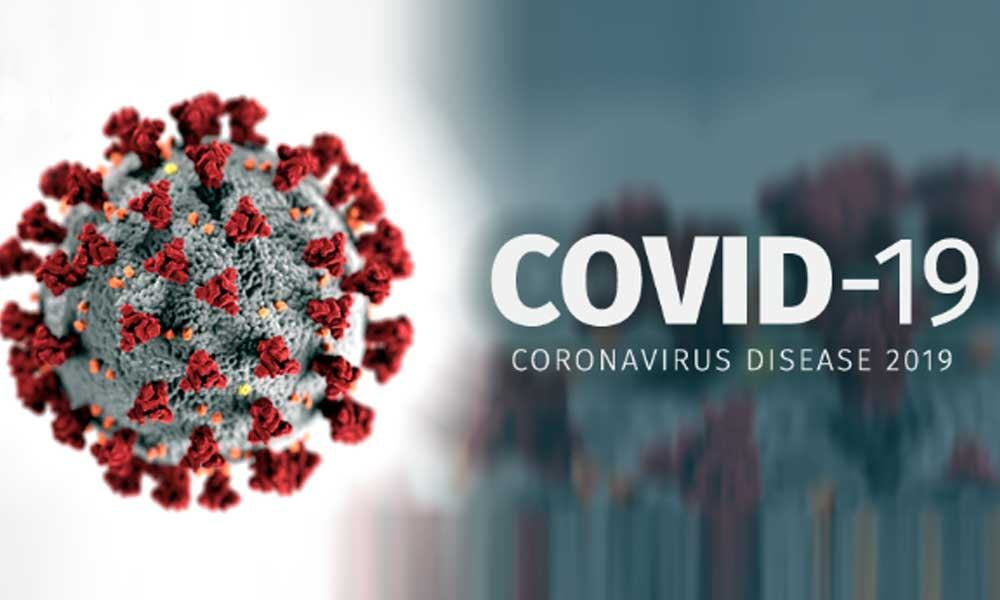

In [2]:
Image("../input/covid19-pic/1600x960_951531-coronavirus.jpg")

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

# Load 1st dataset name = covid_19_india

In [4]:
df_covid = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")

In [5]:
df_covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [6]:
 df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


Drops some columns

In [7]:
df_covid = df_covid.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],axis = 1)

In [8]:
df_covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [9]:
df_covid.describe()

,Cured,Deaths,Confirmed
count,1.811000e+04,18110.000000,1.811000e+04
mean,2.786375e+05,4052.402264,3.010314e+05
std,6.148909e+05,10919.076411,6.561489e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,3.360250e+03,32.000000,4.376750e+03
50%,3.336400e+04,588.000000,3.977350e+04
75%,2.788698e+05,3643.750000,3.001498e+05
max,6.159676e+06,134201.000000,6.363442e+06


In [10]:
df_covid['Date'] = pd.to_datetime(df_covid['Date'],format = '%Y-%m-%d')

In [11]:
df_covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


# Create Active cases columns

In [12]:
df_covid['Active_Cases']  = df_covid['Confirmed'] - (df_covid['Cured']+ df_covid['Deaths'])
# df_covid.head()
df_covid.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


# State wise information Table

In [13]:
statewise = pd.pivot_table(df_covid,values = ["Confirmed","Deaths","Cured"],index = "State/UnionTerritory",aggfunc = max)

In [14]:
statewise

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646
Bihar****,715730,701234,9452
Cases being reassigned to states,9265,0,0
Chandigarh,61992,61150,811
Chhattisgarh,1003356,988189,13544


# Recovery Rate

In [15]:
statewise["Recovery Rate"] = statewise["Cured"]*100/statewise["Confirmed"]
statewise["Recovery Rate"]

State/UnionTerritory
Andaman and Nicobar Islands                 98.198198
Andhra Pradesh                              98.365591
Arunachal Pradesh                           94.498567
Assam                                       97.142232
Bihar                                       98.631285
Bihar****                                   97.974655
Cases being reassigned to states             0.000000
Chandigarh                                  98.641760
Chhattisgarh                                98.488373
Dadra and Nagar Haveli                      98.882143
Dadra and Nagar Haveli and Daman and Diu    99.924911
Daman & Diu                                  0.000000
Delhi                                       98.220276
Goa                                         97.613389
Gujarat                                     98.753704
Haryana                                     98.659419
Himachal Pradesh                            97.193408
Himanchal Pradesh                           97.811418
Jammu a

# Mortality Rate

In [16]:
statewise["Mortality Rate"] = statewise["Deaths"]*100/statewise["Confirmed"]
statewise["Mortality Rate"]

State/UnionTerritory
Andaman and Nicobar Islands                 1.709062
Andhra Pradesh                              0.683262
Arunachal Pradesh                           0.490070
Assam                                       0.940729
Bihar                                       1.329971
Bihar****                                   1.320610
Cases being reassigned to states            0.000000
Chandigarh                                  1.308233
Chhattisgarh                                1.349870
Dadra and Nagar Haveli                      0.038547
Dadra and Nagar Haveli and Daman and Diu    0.037545
Daman & Diu                                 0.000000
Delhi                                       1.744647
Goa                                         1.838626
Gujarat                                     1.221329
Haryana                                     1.253321
Himachal Pradesh                            1.695460
Himanchal Pradesh                           1.714780
Jammu and Kashmir        

In [17]:
statewise = statewise.sort_values(by="Confirmed",ascending = False)

In [18]:
statewise.style.background_gradient(cmap = "cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


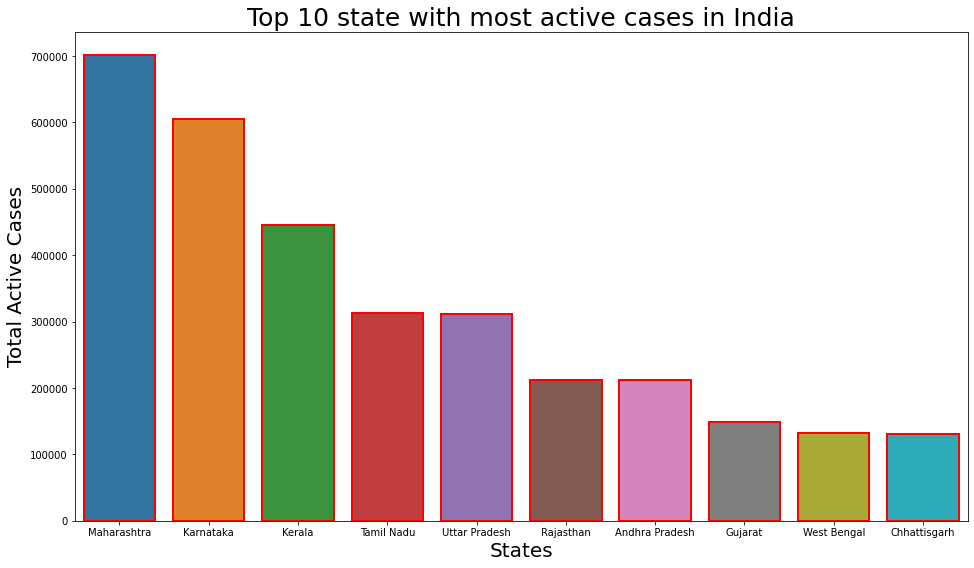

In [19]:
# Top 10 actives cases

top_10_active_cases = df_covid.groupby(by='State/UnionTerritory').max()[['Active_Cases','Date']].sort_values(by=['Active_Cases'],ascending = False).reset_index()
fig = plt.figure(figsize=(16,9))
ax = sns.barplot(data = top_10_active_cases.iloc[:10],y="Active_Cases",x = "State/UnionTerritory",linewidth=2,edgecolor ='red')

plt.title("Top 10 state with most active cases in India",size = 25)
plt.xlabel("States",size = 20)
plt.ylabel("Total Active Cases",size = 20)
plt.show()

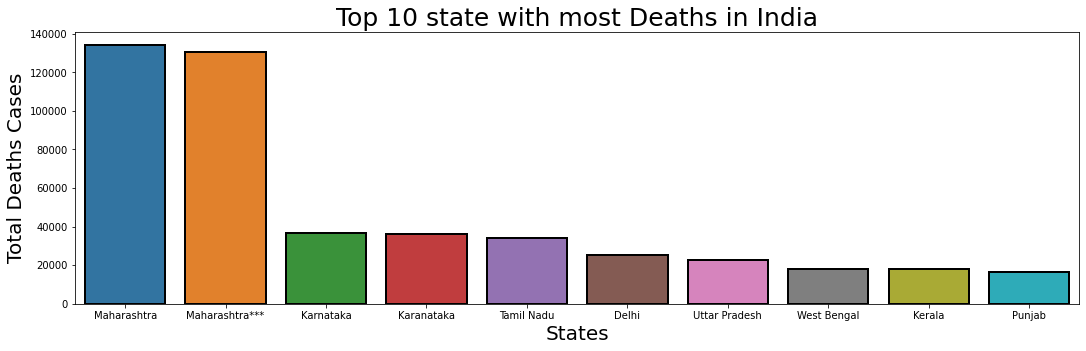

In [20]:
# Top ststes with hight death

top_10_deaths = df_covid.groupby(by = 'State/UnionTerritory').max()[['Deaths','Date']].sort_values(by=['Deaths'],ascending = False).reset_index()
fig = plt.figure(figsize=(18,5))
ax = sns.barplot(data = top_10_deaths.iloc[:10],x = "State/UnionTerritory", y="Deaths",linewidth=2,edgecolor ='black')

plt.title("Top 10 state with most Deaths in India",size = 25)
plt.xlabel("States",size = 20)
plt.ylabel("Total Deaths Cases",size = 20)
plt.show()



# Grouth trend

Text(0.5, 1.0, 'Top 5 Affected States in India')

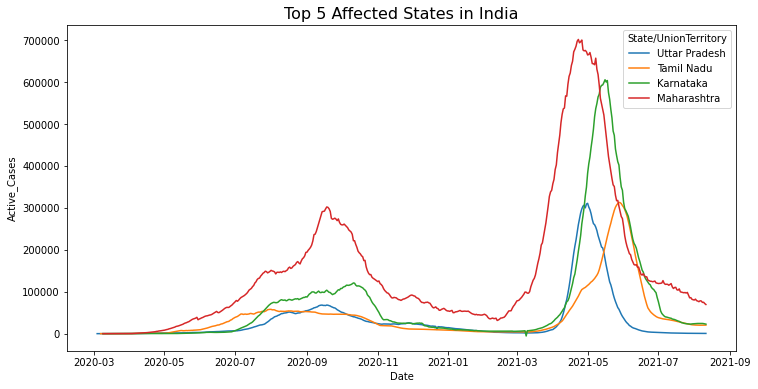

In [21]:

fig = plt.figure(figsize=(12,6))
ax = sns.lineplot(data = df_covid[df_covid['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Kerela','Tamil Nadu','Uttar Pradesh'])],x='Date',y='Active_Cases',hue = 'State/UnionTerritory')

ax.set_title("Top 5 Affected States in India",size = 16)

# Load 2nd dataset Name = covid_vaccine_statewise

In [22]:
df_vaccine = pd.read_csv('../input/covid19-in-india/covid_vaccine_statewise.csv')

In [23]:
df_vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [24]:
df_vaccine.rename(columns = {'Updated On' : 'Vaccine_Date'},inplace = True)

In [25]:
df_vaccine.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [26]:
df_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

# Chaking null values 

In [27]:
df_vaccine.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [28]:
# Drops some columns

vaccination = df_vaccine.drop(columns = ['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'],axis=1)

In [29]:
vaccination.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


# Male vs Female Vaccination

In [30]:
male = vaccination['Male(Individuals Vaccinated)'].sum()
female = vaccination['Female(Individuals Vaccinated)'].sum()
px.pie(names = ['Male','Female'],values=[male,female],title = "Male and Female Vaccination")

In [31]:
# Removies row where state = India

vaccine = df_vaccine[df_vaccine.State !='India']
vaccine.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [32]:
# Rename columns name

vaccine.rename(columns ={'Total Individuals Vaccinated':'Total'},inplace = True)
vaccine.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


# Most vaccinated State

In [33]:
max_vac = vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vac = max_vac.sort_values('Total',ascending = False)[:5]
max_vac


,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


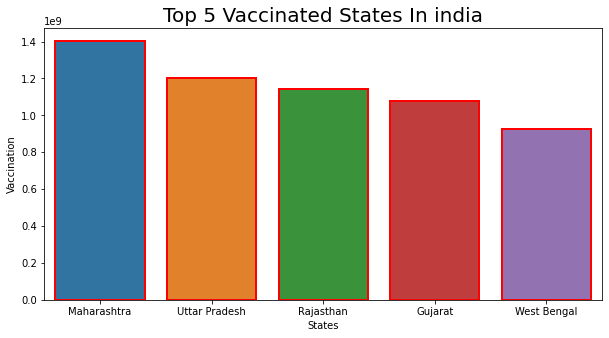

In [34]:
fig = plt.figure(figsize=(10,5))
plt.title("Top 5 Vaccinated States In india",size = 20)
x = sns.barplot(data = max_vac.iloc[:10],y = max_vac.Total, x = max_vac.index, linewidth = 2,edgecolor='red')
plt.xlabel('States')
plt.ylabel("Vaccination")
plt.show()